In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving AverageIncomeByCounty.csv to AverageIncomeByCounty.csv
Saving CaliforniaCensusDataByZip.csv to CaliforniaCensusDataByZip.csv
Saving CaliforniaZipCodeCounties.csv to CaliforniaZipCodeCounties.csv
Saving CaliHealthCounties.txt to CaliHealthCounties.txt
Saving CaliHealthFacilities.csv to CaliHealthFacilities.csv
Saving ClinicCostandCapacity - Sheet1.csv to ClinicCostandCapacity - Sheet1.csv
Saving CountyWalkability.csv to CountyWalkability.csv
Saving LanguageSpokenAtHome.csv to LanguageSpokenAtHome.csv
Saving Likelihood to Receive Vaccine Conversion Chart.xlsx to Likelihood to Receive Vaccine Conversion Chart.xlsx
Saving Pop_up_Clinics.csv to Pop_up_Clinics.csv
Saving PublicAssitanceByCounty.csv to PublicAssitanceByCounty.csv
Saving PublicTransitData.csv to PublicTransitData.csv
Saving VaccinationSurveyData.csv to VaccinationSurveyData.csv


In [ ]:
california_zip_code = pd.read_csv('CaliforniaZipCodeCounties.csv')
likelihood_receive = pd.read_excel('Likelihood to Receive Vaccine Conversion Chart.xlsx')
vaccination_survey_data = pd.read_csv('VaccinationSurveyData.csv')

In [ ]:
california_census_data = pd.read_csv('CaliforniaCensusDataByZip.csv')
cali_health_facilities = pd.read_csv('CaliHealthFacilities.csv')
pop_up_clinics = pd.read_csv('Pop_up_Clinics.csv')
vaccination_survey_data = pd.read_csv('VaccinationSurveyData.csv')
zip_to_city_mapping = pd.read_csv('CaliforniaZipCodeCounties.csv')
clinic_cost_capacity=pd.read_csv('ClinicCostandCapacity - Sheet1.csv')
County_Walkability = pd.read_csv('CountyWalkability.csv')

# Q1 - Total Demand

Merge the vaccination survey data and likelihood for vaccination. Then calculate the average likelihood for vaccination

In [ ]:
vaccination_survey_data.rename(columns = {'I intend to get vaccinated for COVID-19 when the vaccine becomes available to me. (1-7 scale with 7 being Likely and 1 being Unlikely)':'intention'}, inplace = True)

In [ ]:
likelihood_receive.rename(columns = {'Self-Reporting Likelihood to Receive a Vaccine (1-7 scale)':'intention',
                                     'Percent Likelihood to Request a Vaccine Appointment':'percent'},inplace = True)

In [ ]:
vaccination_survey_likelihood = pd.merge(vaccination_survey_data, likelihood_receive, how='left', on='intention')

In [ ]:
vaccination_survey_likelihood.head()

,Unnamed: 0,COVID Status,Gender,Race,Hispanic or Latino/A,Age,Trust in science (1-5 scale with 5 indicating most trust),Level of religious commitment (1-10 scale with 10 indicating highest trust),Political orientation (1-10 scale with 10 indicating most conservative and 1 indicating most liberal),How serious would it be for you if you contract COVID-19 in the next year? (1-10 scale with 10 being most serious),How confident are you that you can prevent getting COVID-19 in case of an outbreak? (1-5 scale with 5 being very confident),Please indicate your level of agreement with this statement: ‘My family and friends avoid crowded areas.’ (1-7 scale with 7 being strongly agree),intention,percent
0,0,Hasn't had COVID,Female,White,Not Hispanic or Latino/A,16,2,2,5,8,4,7,4,0.60
1,1,Hasn't had COVID,Male,White,Not Hispanic or Latino/A,70,5,8,2,5,3,1,6,0.85
2,2,Hasn't had COVID,Male,White,Not Hispanic or Latino/A,34,4,7,1,5,1,7,6,0.85
3,3,Had COVID,Female,Asian,Not Hispanic or Latino/A,39,5,4,4,5,1,5,7,0.95
4,4,Hasn't had COVID,Male,White,Not Hispanic or Latino/A,26,4,3,5,6,3,4,5,0.70


In [ ]:
avg_likelihood_vacciantion = vaccination_survey_likelihood['percent'].mean()
avg_likelihood_vacciantion

0.7341682723185613

In [ ]:
california_census_data.rename(columns = {'SEX AND AGE!!Total population':'total_population'}, inplace = True)

In [ ]:
california_total_demand = california_census_data
california_total_demand['total_demand'] = california_total_demand['total_population']*avg_likelihood_vacciantion
california_total_demand = california_total_demand[['Geography','Geographic Area Name','total_demand']]
california_total_demand.head()

,Geography,Geographic Area Name,total_demand
0,8600000US89010,89010,344.324920
1,8600000US89019,89019,1518.259987
2,8600000US89060,89060,7849.727168
3,8600000US89061,89061,4065.089724
4,8600000US89439,89439,913.305331


## Merge the city and county name to the california_total_demand for further groupby analysis

In [ ]:
california_total_demand = pd.merge(california_total_demand, california_zip_code, left_on = 'Geographic Area Name', right_on = 'zip', how = 'left')

In [ ]:
california_total_demand['city'].isna().mean()
# 10% of area has no matching zip, not low but acceptable

0.0966647823629169

In [ ]:
california_total_demand = california_total_demand[['Geography','zip','city','county','total_demand']]

In [ ]:
california_total_demand1=california_total_demand[(california_total_demand['county']=='Glenn')|(california_total_demand['county']=='Butte')|(california_total_demand['county']=='Colusa')|(california_total_demand['county']=='Yolo')|(california_total_demand['county']=='Solano')|(california_total_demand['county']=='Sacramento')|(california_total_demand['county']=='El Dorado')|(california_total_demand['county']=='Sutter')|(california_total_demand['county']=='Yuba')|(california_total_demand['county']=='Placer')|(california_total_demand['county']=='Nevada')|(california_total_demand['county']=='Sierra')]
california_total_demand1

,Geography,zip,city,county,total_demand
1016,8600000US94510,94510.0,Benicia,Solano,20774.759602
1034,8600000US94533,94533.0,Fairfield,Solano,57775.372190
1036,8600000US94535,94535.0,Travis Afb,Solano,2501.311304
1065,8600000US94571,94571.0,Rio Vista,Solano,7583.958253
1077,8600000US94585,94585.0,Suisun City,Solano,21548.572961
...,...,...,...,...,...
1762,8600000US96145,96145.0,Tahoe City,Placer,1955.824277
1763,8600000US96146,96146.0,Olympic Valley,Placer,804.648426
1764,8600000US96148,96148.0,Tahoe Vista,Placer,498.500257
1765,8600000US96150,96150.0,South Lake Tahoe,El Dorado,22295.956262


### total_demand_by_city(include city or country = NA)

In [ ]:
total_demand_by_city = california_total_demand1[['Geography','zip','city','total_demand']]
total_demand_by_city = california_total_demand1.groupby('city', dropna=False)['total_demand'].sum().reset_index()

In [ ]:
total_demand_by_city.head()

,city,total_demand
0,Alta,781.155042
1,Antelope,35187.216956
2,Applegate,668.093128
3,Arbuckle,3753.068208
4,Auburn,35620.376236


### total_demand_by_county(include city or county = NA)

In [ ]:
total_demand_by_county = california_total_demand.groupby('county', dropna=False)['total_demand'].sum().reset_index()

In [ ]:
total_demand_by_county=total_demand_by_county.dropna()
total_demand_by_county

,county,total_demand
0,Alameda,1.223870e+06
1,Alpine,6.805740e+02
2,Amador,2.857383e+04
3,Butte,1.640293e+05
4,Calaveras,3.333564e+04
5,Colusa,1.590355e+04
6,Contra Costa,7.940632e+05
7,Del Norte,2.033059e+04
8,El Dorado,1.396337e+05
9,Fresno,6.789845e+05


In [ ]:
total_demand_by_county1=total_demand_by_county[(total_demand_by_county['county']=='Glenn')|(total_demand_by_county['county']=='Butte')|(total_demand_by_county['county']=='Colusa')|(total_demand_by_county['county']=='Yolo')|(total_demand_by_county['county']=='Solano')|(total_demand_by_county['county']=='Sacramento')|(total_demand_by_county['county']=='El Dorado')|(total_demand_by_county['county']=='Sutter')|(total_demand_by_county['county']=='Yuba')|(total_demand_by_county['county']=='Placer')|(total_demand_by_county['county']=='Nevada')|(total_demand_by_county['county']=='Sierra')]
total_demand_by_county1

,county,total_demand
3,Butte,1.640293e+05
5,Colusa,1.590355e+04
8,El Dorado,1.396337e+05
10,Glenn,2.099281e+04
28,Nevada,6.949270e+04
30,Placer,2.897960e+05
33,Sacramento,1.087329e+06
45,Sierra,1.496235e+03
47,Solano,2.969960e+05
50,Sutter,7.018722e+04


In [ ]:
total_demand_by_county1=total_demand_by_county1.set_index('county')
total_demand_by_county1

,total_demand
county,
Butte,1.640293e+05
Colusa,1.590355e+04
El Dorado,1.396337e+05
Glenn,2.099281e+04
Nevada,6.949270e+04
Placer,2.897960e+05
Sacramento,1.087329e+06
Sierra,1.496235e+03
Solano,2.969960e+05


In [ ]:
total_demand_by_county1['total_demand']=round(total_demand_by_county1['total_demand'])
total_demand_by_county1

,total_demand
county,
Butte,164029.0
Colusa,15904.0
El Dorado,139634.0
Glenn,20993.0
Nevada,69493.0
Placer,289796.0
Sacramento,1087329.0
Sierra,1496.0
Solano,296996.0


Text(470.72222222222223, 0.5, 'County')

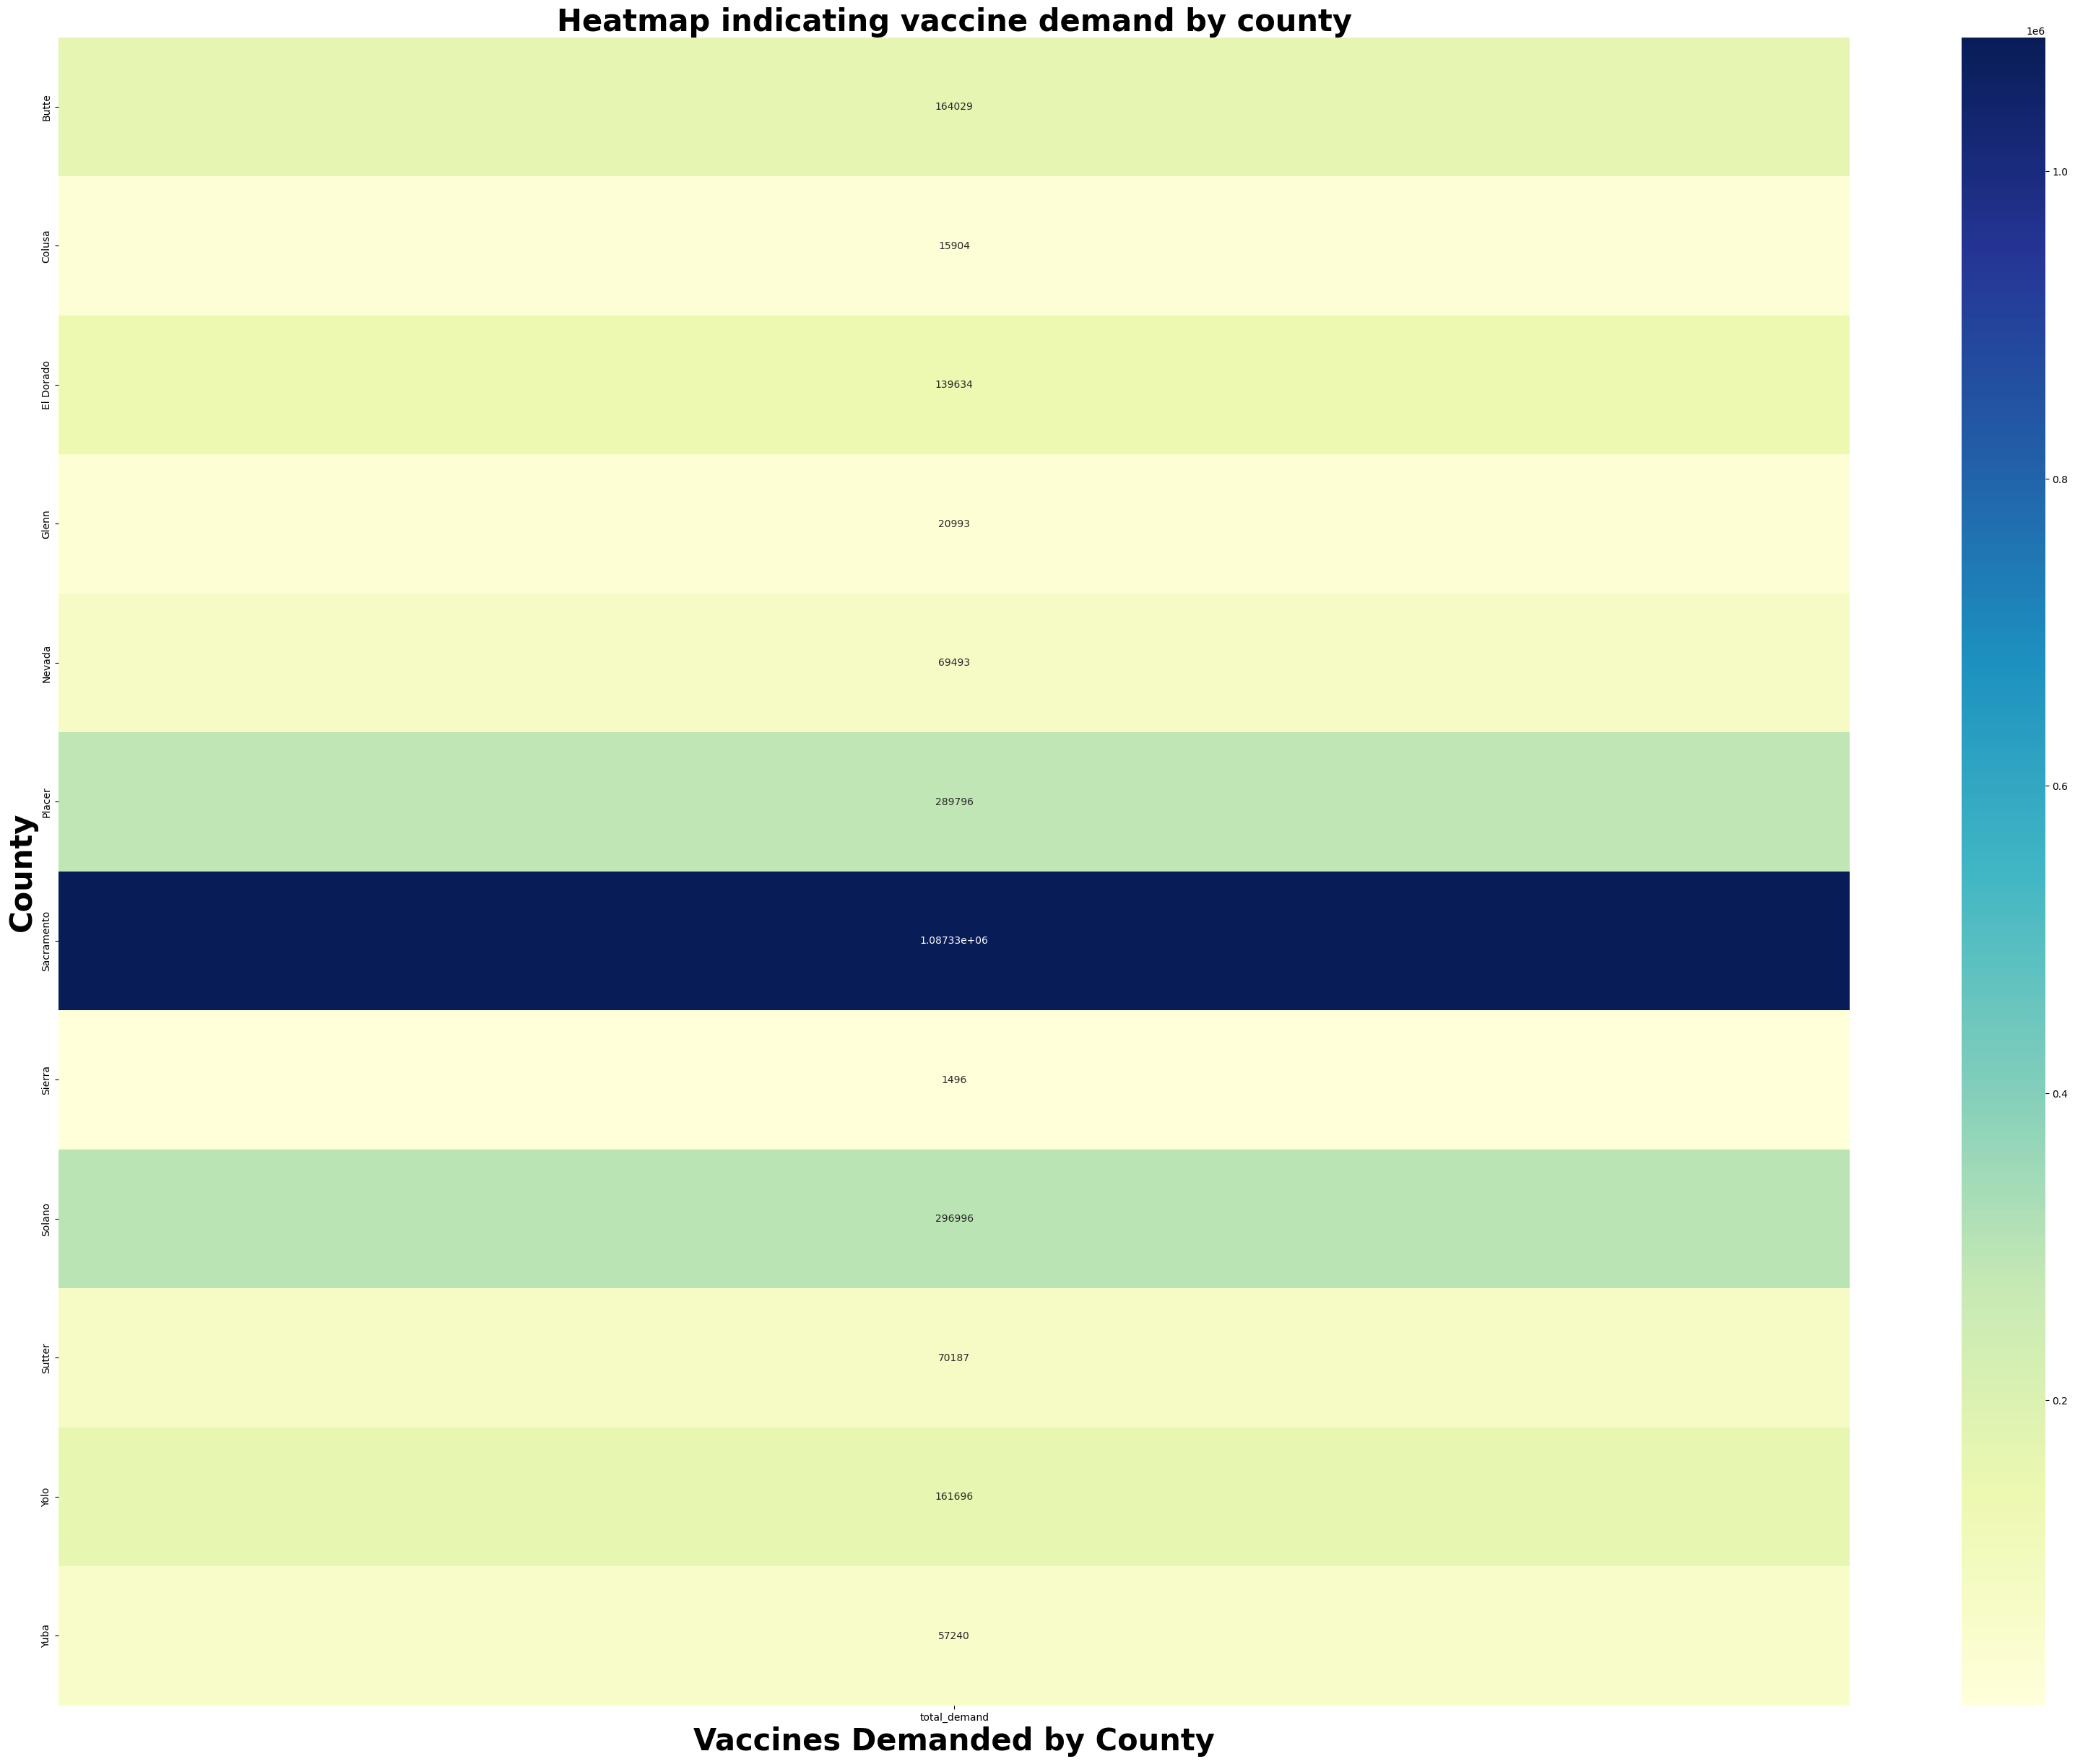

In [ ]:
plt.figure(figsize=(40,30))
sns.heatmap(total_demand_by_county1, annot=True, fmt="g", cmap="YlGnBu")
plt.title('Heatmap indicating vaccine demand by county',fontsize=30,fontweight='bold')
plt.xlabel('Vaccines Demanded by County',fontsize=30,fontweight='bold')
plt.ylabel('County',fontsize=30,fontweight='bold')

### total_demand

In [ ]:
total_demand = california_total_demand1['total_demand'].sum()
total_demand

2374792.8195889527

## Q2 SUPPLY

In [ ]:
pop_up_clinics=pop_up_clinics.drop(columns=['Unnamed: 0'])
pop_up_clinics

,City,Site Name,Facility Type
0,Chico,Chico Athletic Center,Pop-Up Clinic
1,Davis,Davis Community Center,Pop-Up Clinic
2,Lincoln,Lincoln Community Center,Pop-Up Clinic
3,Oroville,Oroville Middle School,Pop-Up Clinic
4,North Highlands,North Highlands Recreation Center,Pop-Up Clinic
...,...,...,...
96,Butte City,Butte City Middle School,Pop-Up Clinic
97,Brooks,Brooks Mosque,Pop-Up Clinic
98,Capay,Capay Community Center,Pop-Up Clinic
99,Weimar,Weimar Middle School,Pop-Up Clinic


In [ ]:
clinic_cost_capacity

,Facility Type,Cost to Renovate Per Square Meter,Square Meteres Available,"Vaccines that can be delivered per square meter, per day (running 8:00 - 20:00)"
0,Outpatient Clinic,"$1,200",40,13
1,Small hospital,"$1,000",125,19
2,Medium hospital,$750,175,19
3,Large hospital,$600,200,19
4,Urgent care,"$2,000",20,13
5,Surgery center,"$2,500",20,13
6,"Pop-Up Clinic (Religious Organization, School,...","$5,000",20,8


In [ ]:
clinic_cost_capacity['Total delivered per day']=clinic_cost_capacity['Square Meteres Available']*clinic_cost_capacity['Vaccines that can be delivered per square meter, per day (running 8:00 - 20:00)']
clinic_cost_capacity.head()

,Facility Type,Cost to Renovate Per Square Meter,Square Meteres Available,"Vaccines that can be delivered per square meter, per day (running 8:00 - 20:00)",Total delivered per day
0,Outpatient Clinic,"$1,200",40,13,520
1,Small hospital,"$1,000",125,19,2375
2,Medium hospital,$750,175,19,3325
3,Large hospital,$600,200,19,3800
4,Urgent care,"$2,000",20,13,260


In [ ]:
cali_health_facilities

,facility zip,facility county,facility city,facility type
0,94510,Solano,Benicia,outpatient clinic
1,94533,Solano,Fairfield,medium hospital
2,94589,Solano,Vallejo,outpatient clinic
3,94590,Solano,Vallejo,outpatient clinic
4,94591,Solano,Vallejo,small hospital
5,94592,Solano,Vallejo,outpatient clinic
6,95602,Placer,Auburn,outpatient clinic
7,95603,Placer,Auburn,outpatient clinic
8,95605,Yolo,West Sacramento,outpatient clinic
9,95608,Sacramento,Carmichael,small hospital


In [ ]:
pop_up_clinics= pop_up_clinics.rename(columns={'City':'facility city','Facility Type':'facility type'})
pop_up_clinics

,facility city,Site Name,facility type
0,Chico,Chico Athletic Center,Pop-Up Clinic
1,Davis,Davis Community Center,Pop-Up Clinic
2,Lincoln,Lincoln Community Center,Pop-Up Clinic
3,Oroville,Oroville Middle School,Pop-Up Clinic
4,North Highlands,North Highlands Recreation Center,Pop-Up Clinic
...,...,...,...
96,Butte City,Butte City Middle School,Pop-Up Clinic
97,Brooks,Brooks Mosque,Pop-Up Clinic
98,Capay,Capay Community Center,Pop-Up Clinic
99,Weimar,Weimar Middle School,Pop-Up Clinic


In [ ]:
merged=pd.concat([pop_up_clinics,cali_health_facilities])
merged1=merged[['facility city','facility type']]
merged1

,facility city,facility type
0,Chico,Pop-Up Clinic
1,Davis,Pop-Up Clinic
2,Lincoln,Pop-Up Clinic
3,Oroville,Pop-Up Clinic
4,North Highlands,Pop-Up Clinic
...,...,...
55,Penn Valley,outpatient clinic
56,Grass Valley,outpatient clinic
57,Yuba City,outpatient clinic
58,Yuba City,outpatient clinic


In [ ]:
clinic_cost_capacity1=clinic_cost_capacity[['Total delivered per day','Facility Type']]
clinic_cost_capacity1

,Total delivered per day,Facility Type
0,520,Outpatient Clinic
1,2375,Small hospital
2,3325,Medium hospital
3,3800,Large hospital
4,260,Urgent care
5,260,Surgery center
6,160,"Pop-Up Clinic (Religious Organization, School,..."


In [ ]:
merged1['facility type'].unique()

array(['Pop-Up Clinic', 'outpatient clinic', 'medium hospital',
       'small hospital', 'surgery center', 'large hospital',
       'urgent care'], dtype=object)

In [ ]:
total_vaccine_delivered_map={
    'Pop-Up Clinic':160,
    'outpatient clinic':520,
    'medium hospital':3325,
    'small hospital':2375,
    'surgery center':260,
    'large hospital':3800,
    'urgent care':260
}
merged1['vaccines supply']=merged1['facility type'].map(total_vaccine_delivered_map)
merged1

<ipython-input-120-8540e42d4f47>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged1['vaccines supply']=merged1['facility type'].map(total_vaccine_delivered_map)


,facility city,facility type,vaccines supply
0,Chico,Pop-Up Clinic,160
1,Davis,Pop-Up Clinic,160
2,Lincoln,Pop-Up Clinic,160
3,Oroville,Pop-Up Clinic,160
4,North Highlands,Pop-Up Clinic,160
...,...,...,...
55,Penn Valley,outpatient clinic,520
56,Grass Valley,outpatient clinic,520
57,Yuba City,outpatient clinic,520
58,Yuba City,outpatient clinic,520


In [ ]:
merged1['vaccines supply']=merged1['vaccines supply']*150

<ipython-input-121-d2345c98b66d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged1['vaccines supply']=merged1['vaccines supply']*150


<ipython-input-122-084e4a00d88b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='facility type',y='vaccines supply',data=merged1,palette='tab10')


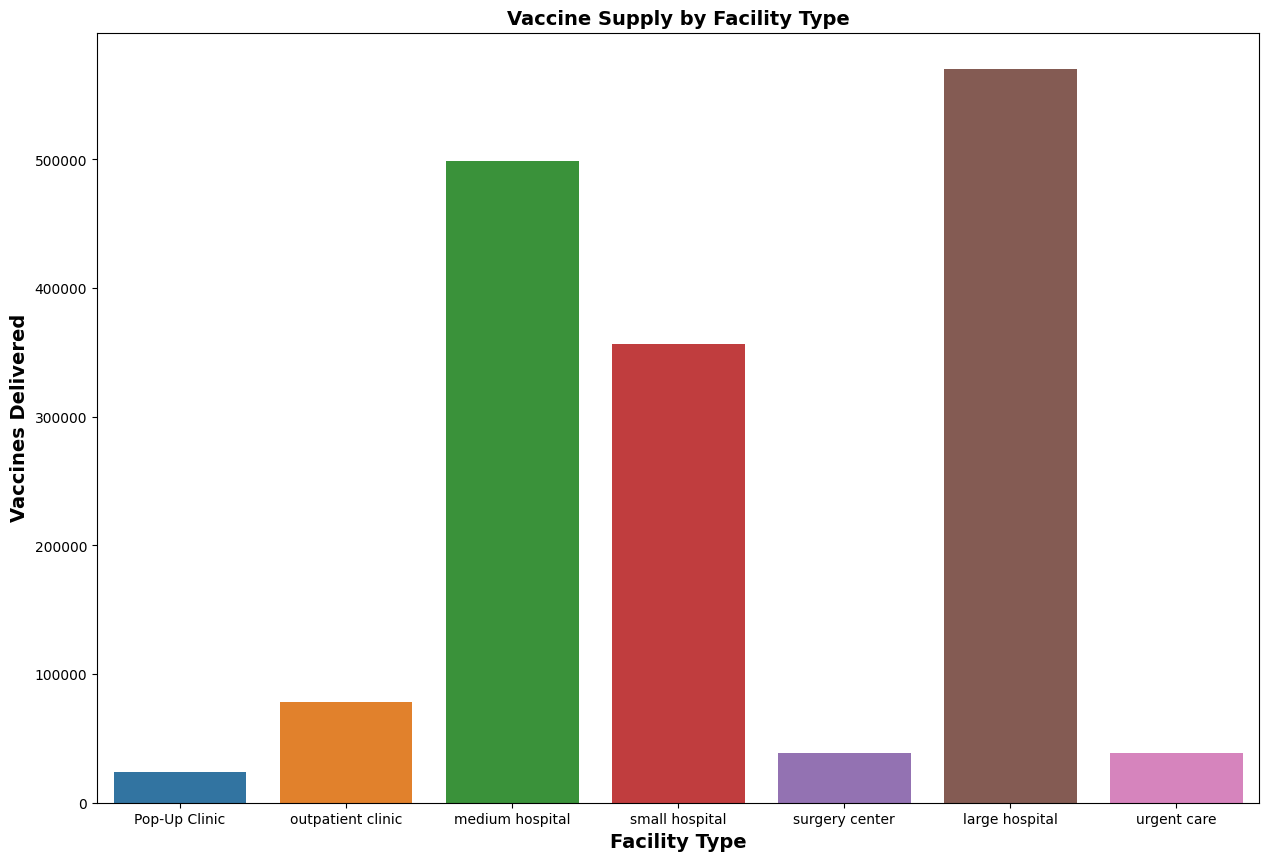

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='facility type',y='vaccines supply',data=merged1,palette='tab10')
plt.title('Vaccine Supply by Facility Type',fontsize=14,fontweight='bold')
plt.xlabel('Facility Type',fontsize=14,fontweight='bold')
plt.ylabel('Vaccines Delivered',fontsize=14,fontweight='bold')
plt.show()

In [ ]:
merged2=merged1.groupby('facility city').sum()
merged2

<ipython-input-123-517252d333ee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged2=merged1.groupby('facility city').sum()


,vaccines supply
facility city,
Alta,24000
Antelope,356250
Applegate,24000
Arbuckle,24000
Auburn,156000
...,...
Willows,24000
Wilton,24000
Winters,24000


Text(470.72222222222223, 0.5, 'Facility City')

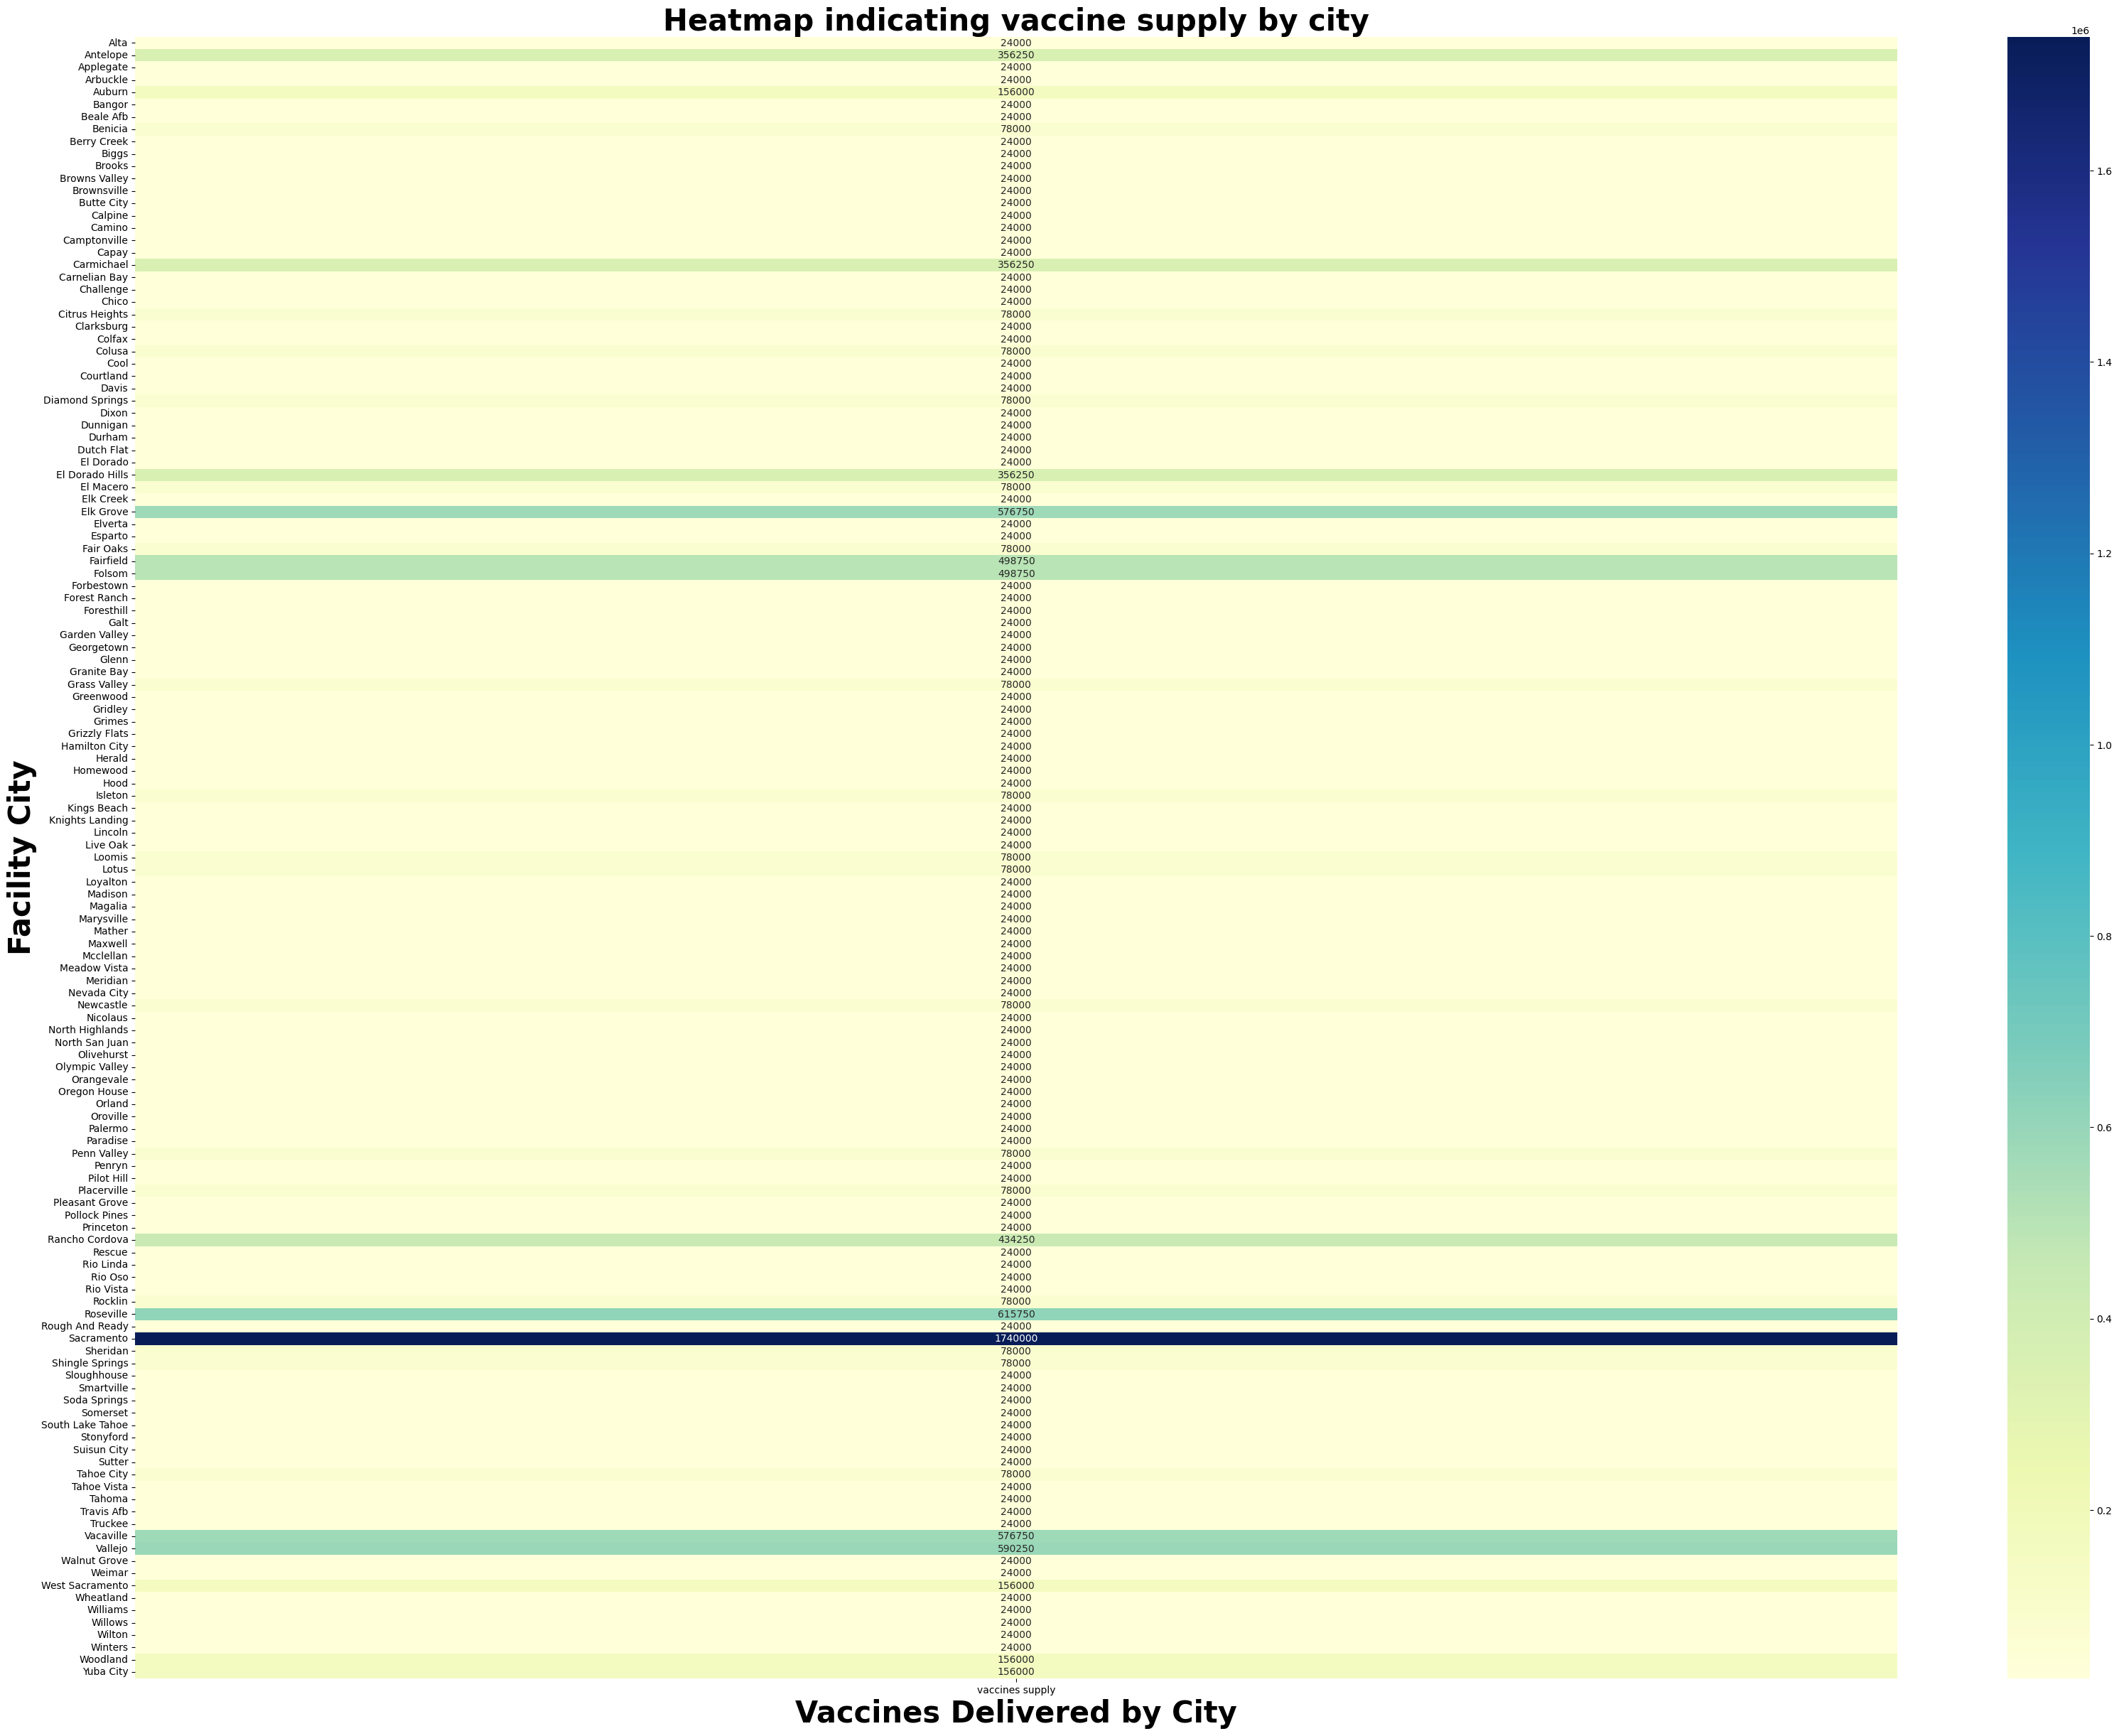

In [ ]:
plt.figure(figsize=(40,30))
sns.heatmap(merged2, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap indicating vaccine supply by city',fontsize=30,fontweight='bold')
plt.xlabel('Vaccines Delivered by City',fontsize=30,fontweight='bold')
plt.ylabel('Facility City',fontsize=30,fontweight='bold')

In [ ]:
total_supply_per_day=merged1['vaccines supply'].sum()
total_supply_per_day

10974000

In [ ]:
number_of_days=total_demand/total_supply_per_day
number_of_days

0.21640175137497292

In [ ]:
total_demand_by_city1=total_demand_by_city.dropna()
total_demand_by_city1=total_demand_by_city1.rename(columns={'city':'facility city'})
total_demand_by_city1

,facility city,total_demand
0,Alta,781.155042
1,Antelope,35187.216956
2,Applegate,668.093128
3,Arbuckle,3753.068208
4,Auburn,35620.376236
...,...,...
128,Willows,6211.063584
129,Wilton,4701.613616
130,Winters,7744.741105
131,Woodland,47464.712974


In [ ]:
merged3=merged1.merge(total_demand_by_city1,on='facility city',how='inner')
merged3

,facility city,facility type,vaccines supply,total_demand
0,Chico,Pop-Up Clinic,24000,85360.276686
1,Davis,Pop-Up Clinic,24000,39501.923892
2,Lincoln,Pop-Up Clinic,24000,38747.198908
3,Oroville,Pop-Up Clinic,24000,36800.184650
4,North Highlands,Pop-Up Clinic,24000,27032.075787
...,...,...,...,...
156,Penn Valley,outpatient clinic,78000,6119.292550
157,Grass Valley,outpatient clinic,78000,34538.212203
158,Yuba City,outpatient clinic,78000,57604.310983
159,Yuba City,outpatient clinic,78000,57604.310983


In [ ]:
merged4=merged3[['facility city','total_demand']]
merged4

,facility city,total_demand
0,Chico,85360.276686
1,Davis,39501.923892
2,Lincoln,38747.198908
3,Oroville,36800.184650
4,North Highlands,27032.075787
...,...,...
156,Penn Valley,6119.292550
157,Grass Valley,34538.212203
158,Yuba City,57604.310983
159,Yuba City,57604.310983


In [ ]:
merged5=merged4.groupby('facility city').sum()
merged5

,total_demand
facility city,
Alta,781.155042
Antelope,35187.216956
Applegate,668.093128
Arbuckle,3753.068208
Auburn,71240.752473
...,...
Willows,6211.063584
Wilton,4701.613616
Winters,7744.741105


Text(470.72222222222223, 0.5, 'City')

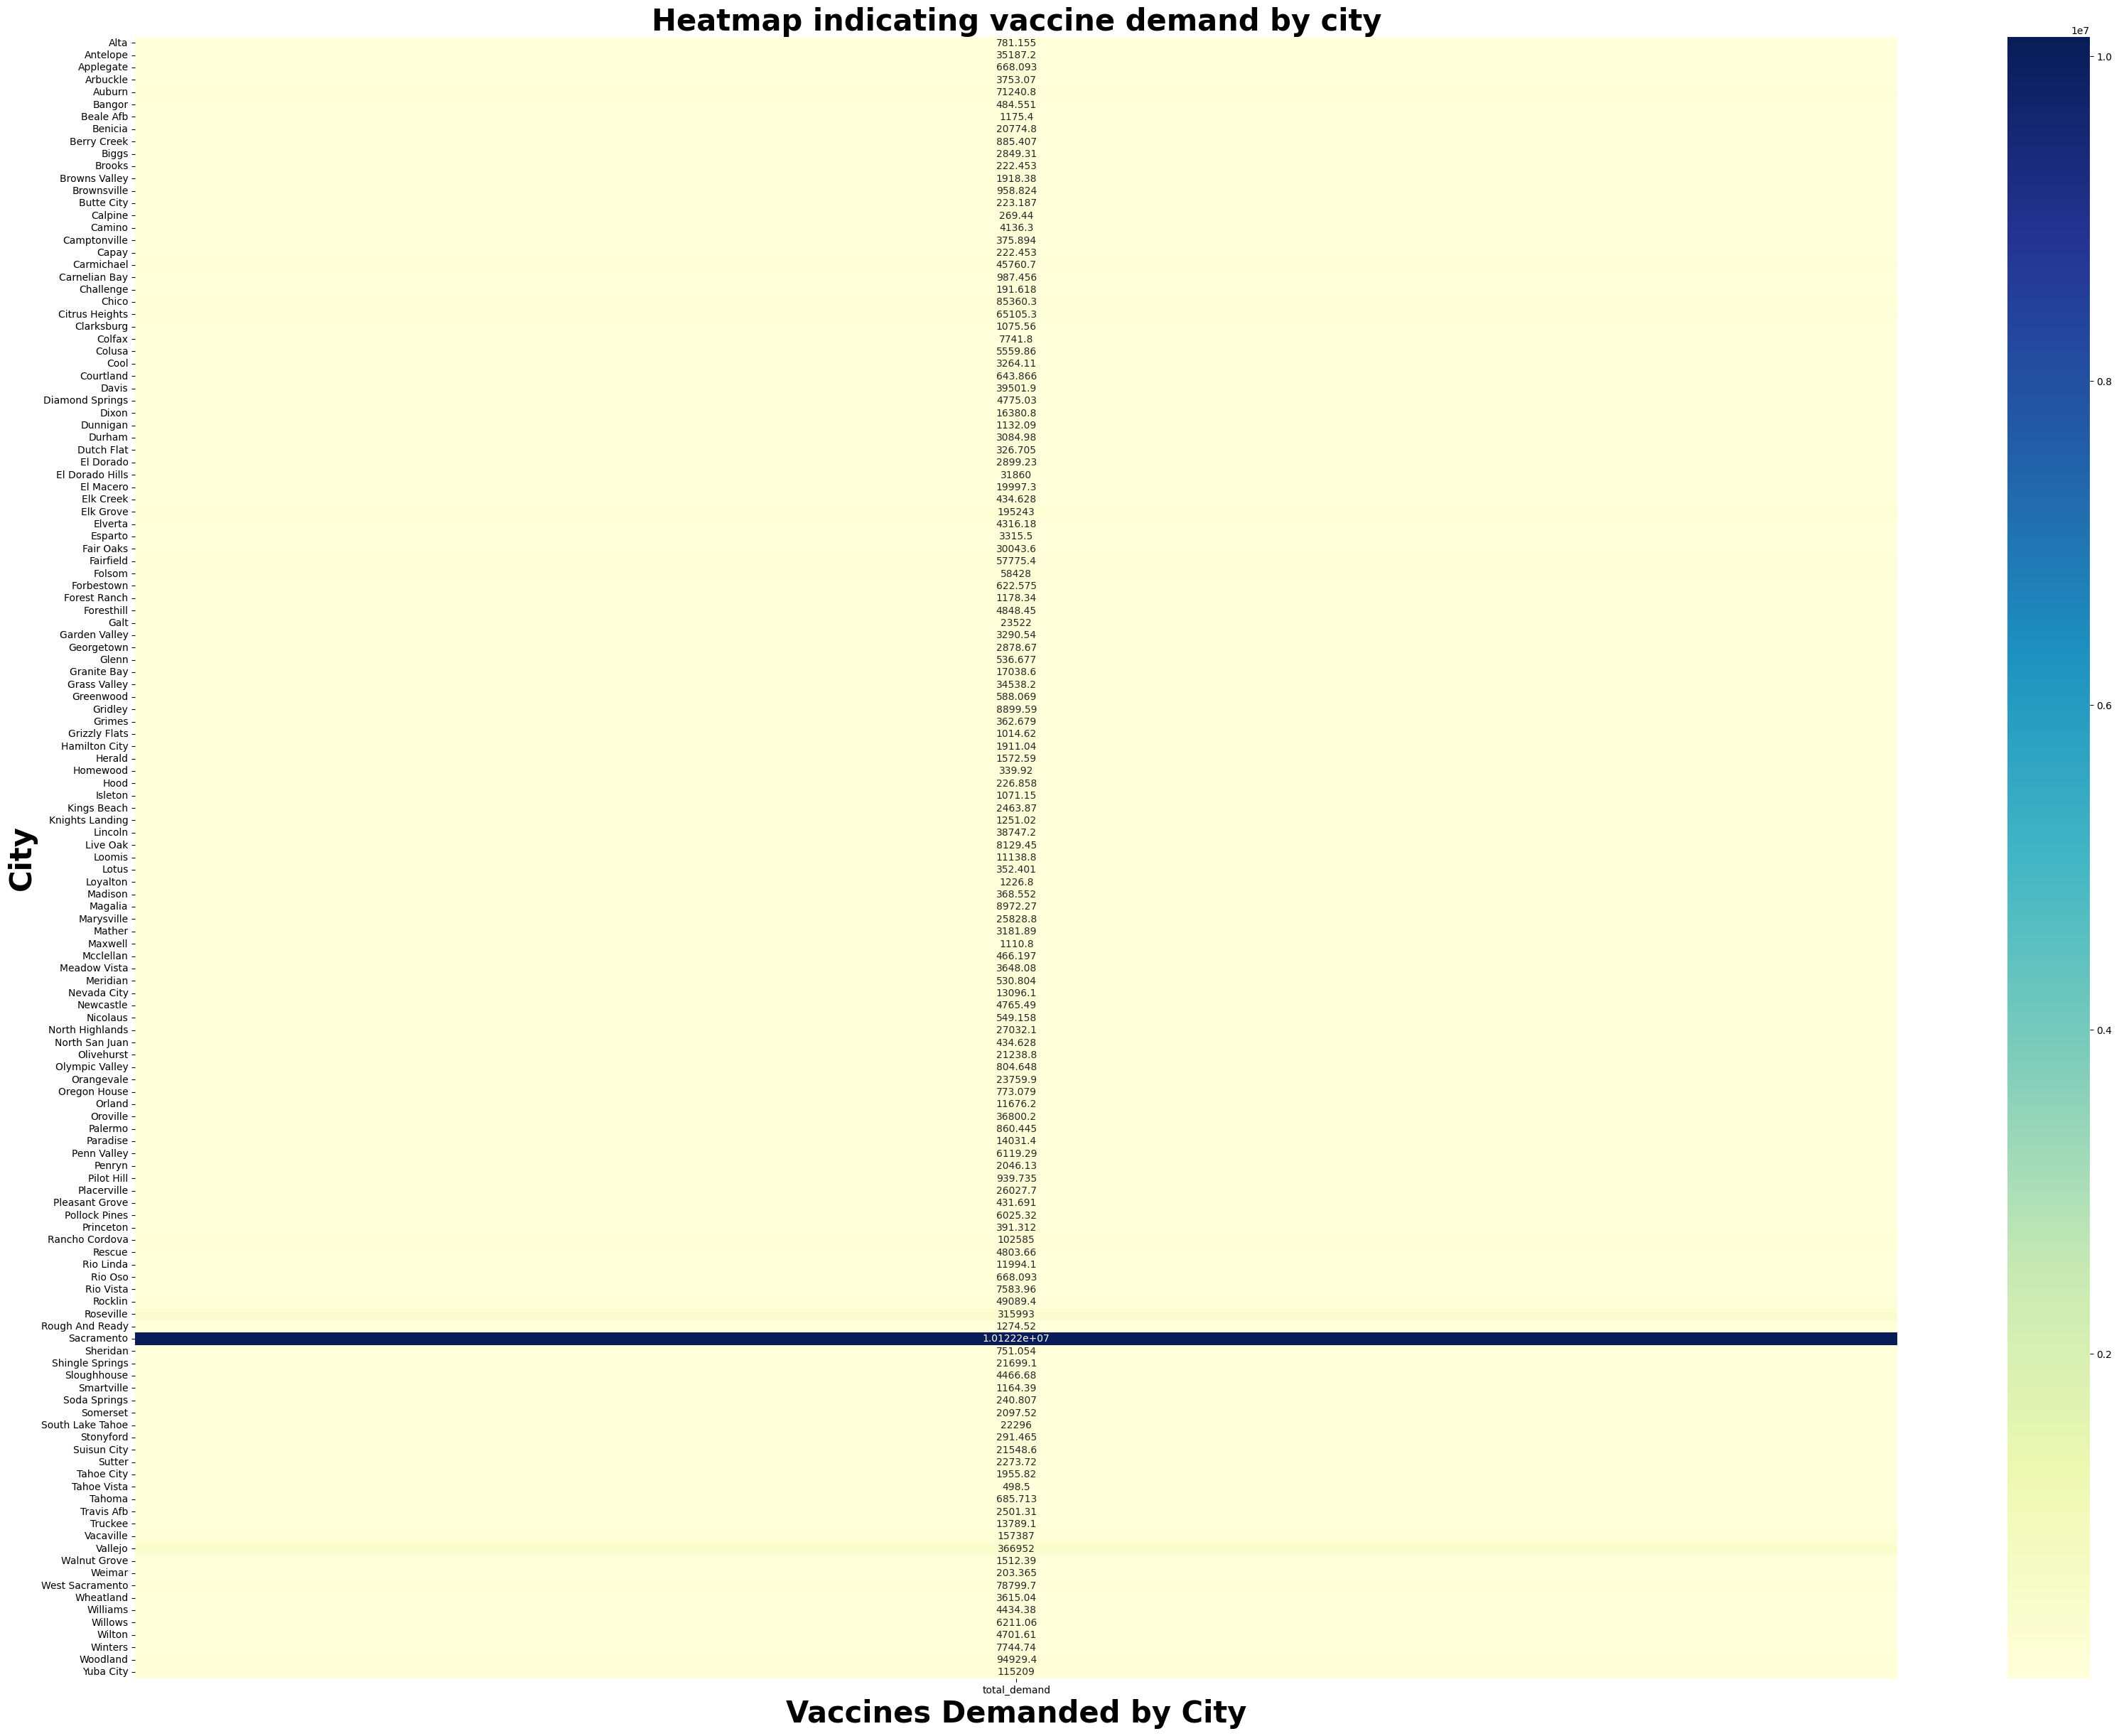

In [ ]:
plt.figure(figsize=(40,30))
sns.heatmap(merged5, annot=True, fmt="g", cmap="YlGnBu")
plt.title('Heatmap indicating vaccine demand by city',fontsize=30,fontweight='bold')
plt.xlabel('Vaccines Demanded by City',fontsize=30,fontweight='bold')
plt.ylabel('City',fontsize=30,fontweight='bold')

In [ ]:
merged6=merged3.groupby('facility city').sum().reset_index()
merged7=merged6.sort_values(by=['total_demand','vaccines supply'],ascending=False)
merged7=merged7.head(10)
merged7

<ipython-input-137-9792137eb223>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged6=merged3.groupby('facility city').sum().reset_index()


,facility city,vaccines supply,total_demand
105,Sacramento,1740000,1.012218e+07
122,Vallejo,590250,3.669520e+05
103,Roseville,615750,3.159934e+05
38,Elk Grove,576750,1.952432e+05
121,Vacaville,576750,1.573866e+05
132,Yuba City,156000,1.152086e+05
97,Rancho Cordova,434250,1.025853e+05
131,Woodland,156000,9.492943e+04
21,Chico,24000,8.536028e+04
125,West Sacramento,156000,7.879975e+04


In [ ]:
# Number of categories
n_categories = len(merged7['facility city'])

# Positions of the left bar-boundaries
barWidth = 0.2  # Width of bars
r1 = np.arange(n_categories)
r2 = [x + barWidth for x in r1]


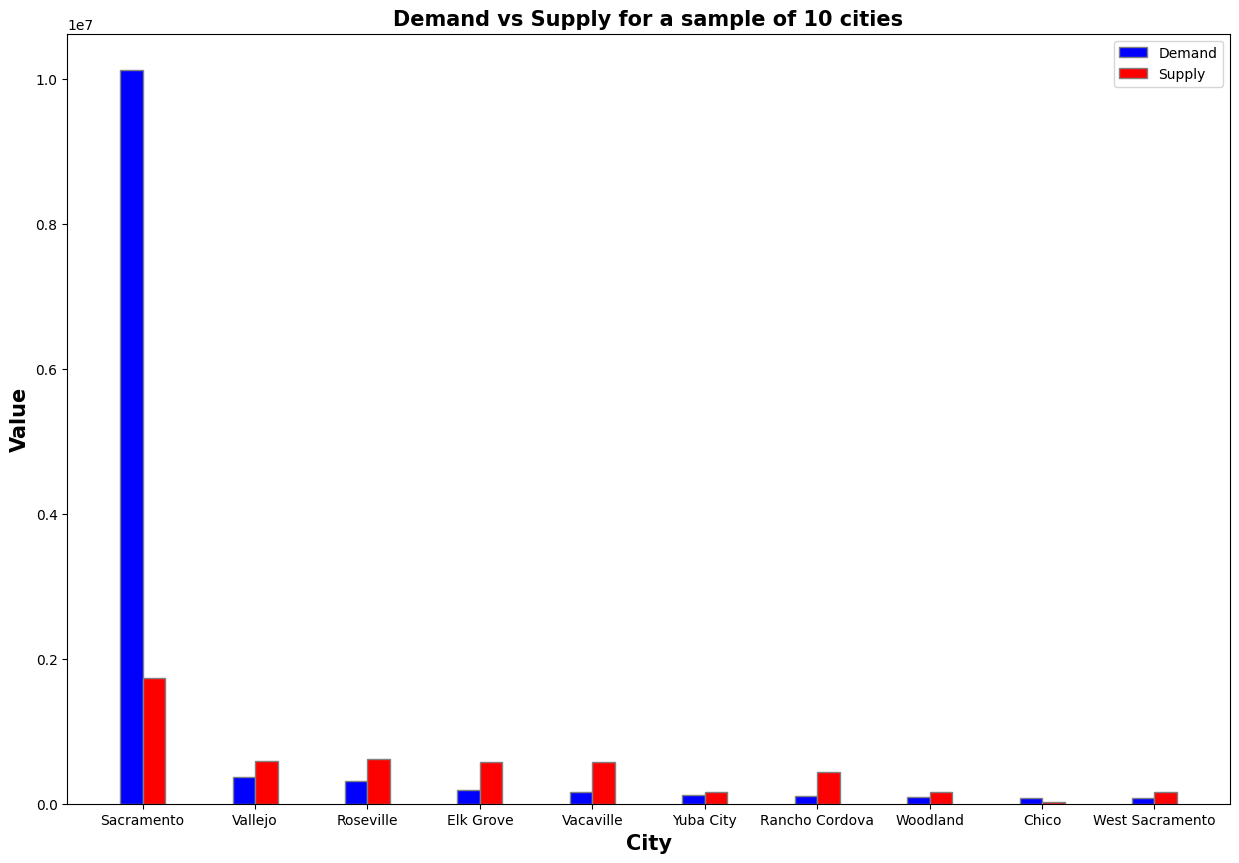

In [ ]:
# Create the figure and axis
plt.figure(figsize=(15, 10))

# Create bars for the first group
plt.bar(r1, merged7['total_demand'], color='blue', width=barWidth, edgecolor='grey', label='Demand')

# Create bars for the second group
plt.bar(r2, merged7['vaccines supply'], color='red', width=barWidth, edgecolor='grey', label='Supply')

# Add xticks on the middle of the group bars
plt.title('Demand vs Supply for a sample of 10 cities',fontsize=15,fontweight='bold')
plt.xlabel('City', fontweight='bold', fontsize=15)
plt.ylabel('Value',fontsize=15,fontweight='bold')
plt.xticks([r + barWidth / 2 for r in range(n_categories)], merged7['facility city'])

# Create legend & Show graphic
plt.legend()
plt.show()


In [ ]:
# q3
df = County_Walkability

In [ ]:
# Calculate summary statistics for 'Average Walkability' and 'Std Deviation Walkability'
summary_stats = df[['Average Walkability', 'Std Deviation Walkability']].describe()

median_walkability = df['Average Walkability'].median()
median_std_dev = df['Std Deviation Walkability'].median()

# Filter counties based on the criteria
optimal_counties = df[(df['Average Walkability'] > median_walkability) &
                      (df['Std Deviation Walkability'] < median_std_dev)]

summary_stats, optimal_counties


(       Average Walkability  Std Deviation Walkability
 count            58.000000                  58.000000
 mean              9.372301                   4.177729
 std               1.271557                   0.370167
 min               6.674837                   2.851696
 25%               8.520414                   4.043693
 50%               9.259215                   4.201424
 75%              10.179907                   4.373972
 max              12.395117                   5.471657,
                COUNTYNAME  Average Walkability  Std Deviation Walkability  \
 5           Colusa County             9.363060                   4.084583   
 6     Contra Costa County            10.452323                   4.084138   
 14            Kern County             9.748569                   4.103291   
 15           Kings County            12.143650                   4.067294   
 17          Lassen County            10.078595                   4.163776   
 18     Los Angeles County          